<a href="https://colab.research.google.com/github/estivenaranjo/clase1/blob/main/Solucion_de_Parcial1_SyS_2024_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parcial 1: Señales y Sistemas 2024-II

 ## Profesor: Andrés Marino Álvarez Meza, Ph.D.


## Departamento de Ingeniería Eléctrica, Electrónica, y Computación
## Universidad Nacional de Colombia - sede Manizales

# Instrucciones

-- Para recibir el crédito total, sus respuestas deben estar justificadas de manera clara, detallada y concreta, mostrando los procedimientos y razonamientos paso a paso.

-- Está permitido el uso de herramientas de inteligencia artificial (IA). Si las utiliza, por favor declare explícitamente cómo fueron empleadas en la resolución de cada pregunta. Incluya los prompts (consultas) y las iteraciones realizadas con las IA durante el desarrollo del parcial.

-- La entrega del parcial debe realizarse antes de las 23:59 del 5 de diciembre de 2024 al correo electrónico amalvarezme@unal.edu.co mediante un enlace de GitHub.

-- Los códigos deben estar debidamente comentados en las celdas correspondientes y explicados en celdas de texto (markdown). Los códigos que no incluyan comentarios ni discusiones no serán considerados en la evaluación final.

# Pregunta 1 (valor 2.5 puntos)

Cuál es la señal obtenida en tiempo discreto al utilizar un conversor análogo digital de 5 bits con frecuencia de muestreo de $5kHz$, entrada análoga de -3.3 a 3.3 [v], aplicado a la señal continua $x(t) = 0.3 \cos(1000\pi t-\pi/4) +
0.6 \sin(2000\pi t) + 0.1 \cos(11000\pi t-\pi)$?. Realizar la simulación del proceso de digitalización incluyendo al menos 3 ciclos de la señal $x(t)$.

En caso de que la digitalización no sea apropiada, diseñe e implemente un conversor adecuado para la señal estudiada. El convesor debe permitir configurar la cantidad de bits, rango de la entrada análoga y la frecuencia de muestreo, indicándole al usuario si dicha frecuencia es apropiada o no, y graficar la señal continua, discreta y digital.

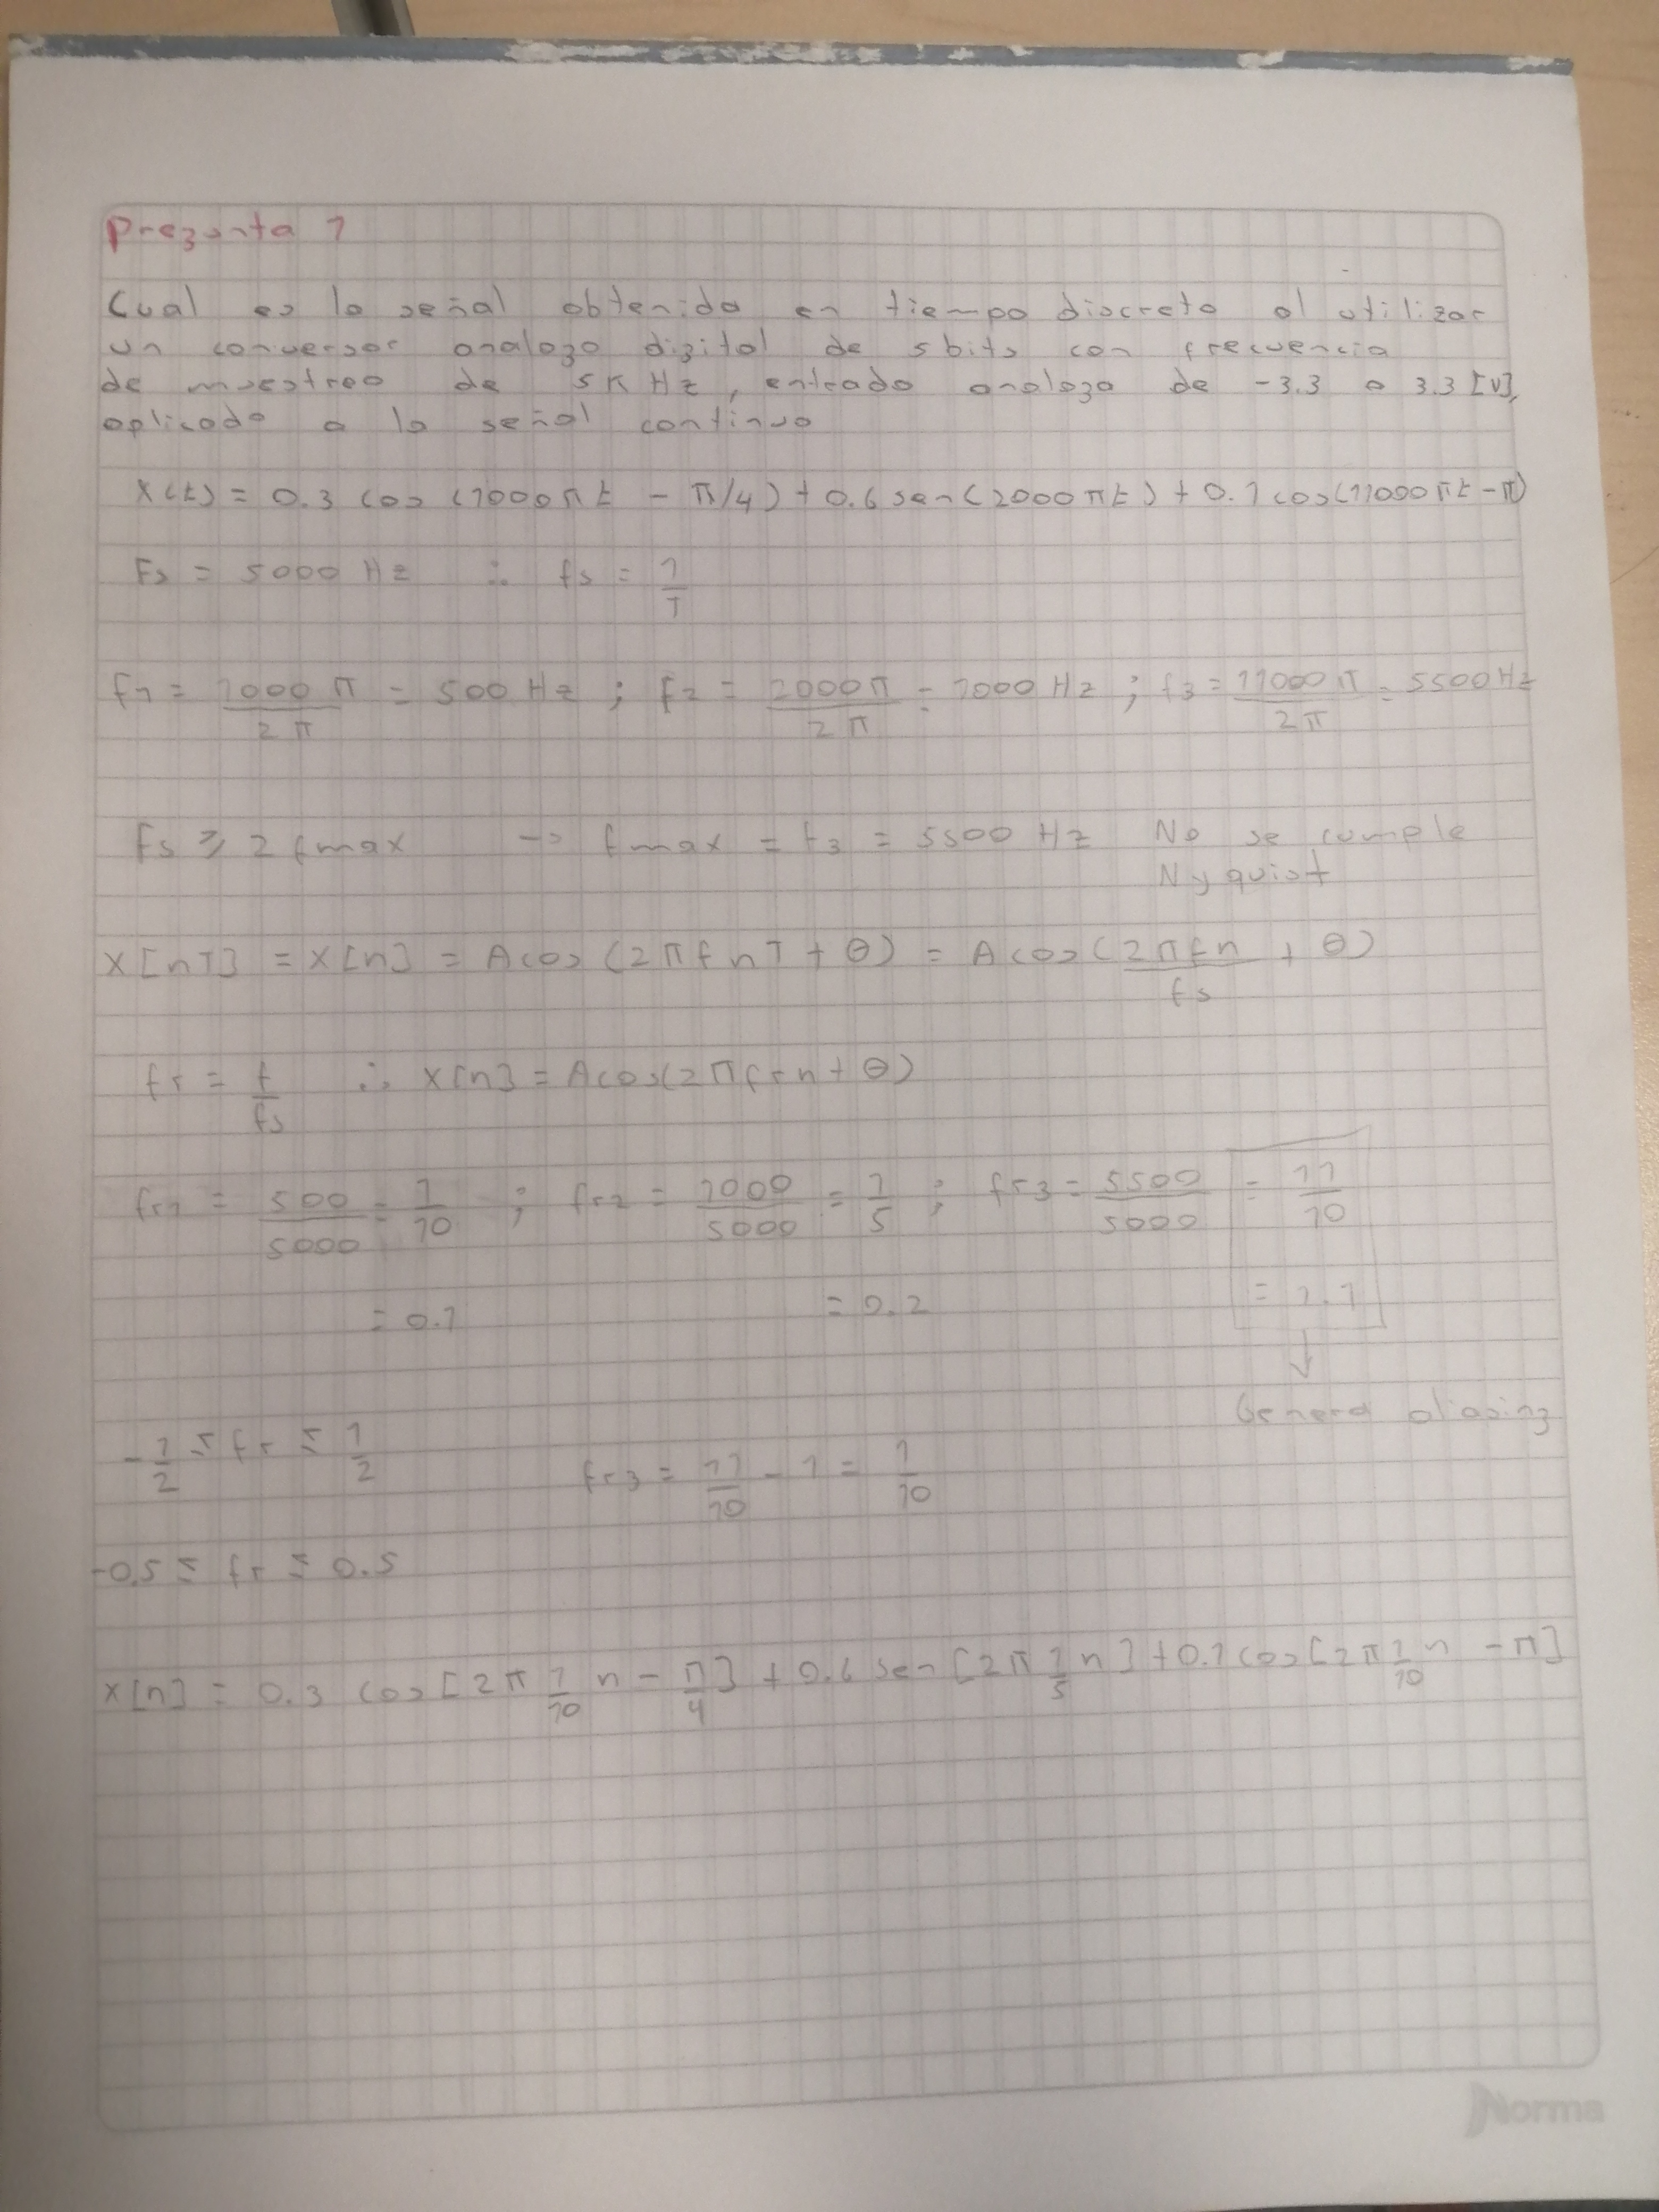

In [ ]:
import numpy as np  # Importa la librería NumPy para operaciones numéricas
import matplotlib.pyplot as plt  # Importa la librería matplotlib para graficar
from scipy.spatial.distance import cdist  # Importa la función cdist para calcular distancias

# Parámetros de la señal
T1 = 1/500  # Periodo de la primera componente (0.002 s)
T2 = 1/1000  # Periodo de la segunda componente (0.001 s)
T3 = 1/5500  # Periodo de la tercera componente (0.00018 s)


F1 = 500  # Frecuencia de la primera componente (500 Hz)
F2 = 1000  # Frecuencia de la segunda componente (1000 Hz)
F3 = 5500  # Frecuencia de la tercera componente (5500 Hz)

T = 1/F1 # Periodo

if max(F1,F2,F3)<2*(max(F1,F2,F3)):
  print('Su frecuencia maxina genera ALISING')

# Frecuencia de muestreo (debe cumplir el Teorema de Nyquist)
Fs = 8*F3  # Frecuencia de muestreo adecuada (8 veces la frecuencia máxima)
Ts = 1/Fs  # Periodo de muestreo (inverso de la frecuencia de muestreo)

# Vector de tiempo
t = np.arange(0, 3*T, Ts)  # Crea un vector de tiempo para 3 periodos de la señal

# Señal analógica
x = 0.3*np.cos(2*np.pi*F1*t-(np.pi/4)) + 0.6*np.sin(2*np.pi*F2*t) + 0.1*np.cos(2*np.pi*F3*t-(np.pi))  # Define la señal analógica

# Gráfica de la señal analógica
plt.plot(t,x)
plt.xlabel('$t[s]$') # Etiqueta del eje X (tiempo en segundos)
plt.ylabel('$x(t)$') # Etiqueta del eje Y (amplitud de la señal)
plt.title('$x(t)=0.3\cos(1000\pi*t-\pi/4) + 0.6 \sin(2000\pi*t) + 0.1\cos(11000\pi*t-\pi)$')# Título de la gráfica
plt.show()

In [ ]:
#función cero y pendiente
def my_ceropend(x,xhmax=10,xhmin=0):
  """
  Escala la señal x al rango [xhmin, xhmax]
  """
  m = (xhmax-xhmin)/(x.max()-x.min())# Calcula la pendiente de la transformación lineal
  b = xhmin - m*x.min()# Calcula el intercepto de la transformación lineal
  xh = m*x+b # Aplica la transformación lineal para escalar
  return xh

In [ ]:
# Define el rango de valores para la señal escalada
xhmax = 3.3
xhmin = -3.3
xh = my_ceropend(x,xhmax, xhmin).reshape(-1,1)# Escala la señal al rango definido
#asegurar vector columna

# Número de bits de cuantización y niveles de cuantización
nbits = 5 #número bits
Ne = 2**nbits #cantidad de estados
res = (xhmax-xhmin)/Ne # Resolución de cada nivel de cuantización

# Valores de cuantización (centro de cada nivel)
ve = np.arange(xhmin,xhmax,res).reshape(-1,1)# Crea un vector con los valores centrales de cada nivel

# Señal cuantizada
xq = np.zeros(len(xh)) # Inicializa un vector para almacenar la señal cuantizada
for i in range(len(xh)): # Busca el nivel de cuantización más cercano para cada valor de la señal escalada
    xq[i] = ve[np.argmin(cdist(xh[i].reshape(-1,1),ve))] #se cálcula la distancia desde cada punto al vector de estados

# Gráfica de la señal original, escalada y cuantizada
plt.plot(t,x,'r',label='$x(t)$')
plt.xlabel('t [s]')
plt.ylabel('Amplitud')
plt.show()
plt.plot(t,xh,'b',label='$\hat{x}(t)$')
plt.stem(t,xq,'y',label='$x_{q}[n]$')
plt.xlabel('n [muestra]')
plt.ylabel('Amplitud')
plt.legend()
plt.show()

# Pregunta 2 (valor 2.5 puntos)

Se dispone de un sistema modelado como una "caja negra" (ver celdas de código). Su tarea es analizar y comprobar mediante simulaciones si el sistema cumple con las propiedades de linealidad e invariancia en el tiempo. En caso de que el sistema sea lineal e invariante con el tiempo, determine su respuesta al impulso y utilice esta respuesta para calcular la salida del sistema ante la siguiente señal:

$x[n] = \sin[100 \pi n ] + \sin[600 \pi n]$

In [ ]:
# cargar sistema
FILEID = "1J9rhh0wWHZSBd8XmWGt1ZpCsMDuoUFmm"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O P1_model.zip && rm -rf /tmp/cookies.txt
!unzip -o P1_model.zip
!dir

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import joblib
from P1_model import system_
from scipy.signal import firwin, freqz, lfilter, filtfilt

#sistema pregunta 2
my_system = system_.My_System()
my_system.create_()
fs = my_system.fs #frecuencia de muestreo
t = np.arange(-0.01, 0.02, 1/fs)  # Tiempo
signal_u = np.heaviside(t,1) # función heaviside
y_u = my_system.predict(signal_u)


# Visualización de las señales
fig, axs = plt.subplots(2,1)
axs[0].stem(t, signal_u, label='Señal de entrada')
axs[0].set_xlabel('Tiempo (s)')
axs[0].set_ylabel('Amplitud')
axs[0].legend()
axs[0].grid()
axs[1].stem(t,y_u, label='Señal salida')
axs[1].set_xlabel('Tiempo (s)')
axs[1].set_ylabel('Amplitud')
axs[1].legend()
axs[1].grid()
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from P1_model import system_

# Inicializar el sistema
my_system = system_.My_System()
my_system.create_()

# Parámetros
fs = my_system.fs  # Frecuencia de muestreo
n = np.arange(-50, 51)  # Rango de índices (discreto)

# 1. Análisis de Linealidad
# Definir señales de prueba
x1 = np.sin(2 * np.pi * 50 * n / fs)  # Señal 1: seno a 50 Hz
x2 = np.cos(2 * np.pi * 120 * n / fs)  # Señal 2: coseno a 120 Hz

# Salidas individuales
y1 = my_system.predict(x1)
y2 = my_system.predict(x2)

# Combinación lineal en la entrada
a, b = 2, -1  # Coeficientes
x_comb = a * x1 + b * x2
y_comb = my_system.predict(x_comb)

# Combinación lineal en la salida
y_expected = a * y1 + b * y2

# Verificar linealidad
linealidad = np.allclose(y_comb, y_expected, atol=1e-6)

# 2. Análisis de Invariancia en el tiempo
# Desplazar señal de entrada
delay = 10  # Desplazamiento de 10 muestras
x_shifted = np.roll(x1, delay)  # Entrada desplazada
y_shifted = my_system.predict(x_shifted)  # Salida con entrada desplazada

# Desplazar la salida original
y1_shifted = np.roll(y1, delay)

# Verificar invariancia en el tiempo
invarianza_tiempo = np.allclose(y_shifted, y1_shifted, atol=1e-6)

# 3. Determinación de la respuesta al impulso
# Entrada: impulso unitario
delta = np.zeros_like(n)
delta[len(n) // 2] = 1  # Impulso unitario
h = my_system.predict(delta)  # Respuesta al impulso

# 4. Cálculo de la salida para la señal dada
# Entrada: combinación de dos senos
x_given = np.sin(100 * np.pi * n / fs) + np.sin(600 * np.pi * n / fs)
y_given = np.convolve(x_given, h, mode='same')  # Salida por convolución

# Graficar resultados
plt.figure(figsize=(12, 10))

# Linealidad
plt.subplot(3, 1, 1)
plt.stem(n, y_comb, linefmt="C0-", markerfmt="C0o", basefmt="C0-", label="Salida combinada")
plt.stem(n, y_expected, linefmt="C1--", markerfmt="C1x", basefmt="C1--", label="Salida esperada")
plt.title(f"Verificación de Linealidad (Resultado: {'Lineal' if linealidad else 'No Lineal'})")
plt.xlabel("n (muestras)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid()

# Invariancia en el tiempo
plt.subplot(3, 1, 2)
plt.stem(n, y_shifted, linefmt="C0-", markerfmt="C0o", basefmt="C0-", label="Salida (entrada desplazada)")
plt.stem(n, y1_shifted, linefmt="C1--", markerfmt="C1x", basefmt="C1--", label="Salida desplazada")
plt.title(f"Verificación de Invariancia en el Tiempo (Resultado: {'Invariante' if invarianza_tiempo else 'No Invariante'})")
plt.xlabel("n (muestras)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid()

# Respuesta al impulso
plt.subplot(3, 1, 3)
plt.stem(n, h, linefmt="C0-", markerfmt="C0o", basefmt="C0-", label="Respuesta al impulso h[n]")
plt.title("Respuesta al Impulso del Sistema")
plt.xlabel("n (muestras)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Mostrar salida para la señal dada
plt.figure(figsize=(10, 6))
plt.stem(n, y_given, linefmt="C0-", markerfmt="C0o", basefmt="C0-", label="Salida ante x[n]")
plt.title("Salida del Sistema ante la Señal $x[n]$")
plt.xlabel("n (muestras)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid()
plt.show()

linealidad, invarianza_tiempo
